In [112]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.metrics import precision_recall_curve 
from inspect import signature
from sklearn.metrics import average_precision_score

from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

train=pd.read_csv('Train_Sample.csv',sep=';')
test=pd.read_csv('Test_Sample.csv',sep=';')

In [113]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41907 entries, 0 to 41906
Columns: 222 entries, Id to par223
dtypes: bool(3), float64(109), int64(107), object(3)
memory usage: 70.1+ MB


In [114]:
train_id=train.Id
test_id=test.Id
y=train.Status

In [115]:
train.drop(columns=['Id','Status'],inplace=True)
test.drop(columns=['Id'],inplace=True)

## Feature Engineering

In [116]:
# from sklearn.covariance import EllipticEnvelope

# train_num=train.drop(columns=train.columns[train.dtypes==object])
# test_num=test.drop(columns=test.columns[test.dtypes==object])

# cov = EllipticEnvelope(random_state=22, support_fraction=1)
# cov.fit(train_num)
# y_ee=cov.predict(train_num)
# from collections import Counter
# print( Counter( y_ee ) )

## Choosing only rows that are inliers 
# X_fil, y_fil=train_num[y_ee==1], y[y_ee==1]

#### frequence counts

In [117]:
# FREQUENCY ENCODE
def encode_FE(df,col,test):
    cv = df[col].value_counts(dropna=False)
    nm = col+'_FE'
    df[nm] = df[col].map(cv)
    test[nm] = test[col].map(cv)
    test[nm].fillna(0,inplace=True)
    return 

In [118]:
# comb = pd.concat([X_fil,test_num],axis=0,sort=True)

# for i,col in tqdm(enumerate(train_num.columns)): encode_FE(comb,col,test_num)
# train_num = comb[:len(train_num)]; del comb
# print('Added '+str( i+1 )+ ' new features')

In [119]:
comb = pd.concat([train,test],axis=0,sort=True)

for i,col in tqdm(enumerate(train.columns)): encode_FE(comb,col,test)
train = comb[:len(train)]; del comb
print('Added '+str( i+1 )+ ' new features')

221it [00:04, 55.09it/s]


Added 221 new features


In [121]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41907 entries, 0 to 41906
Columns: 442 entries, par1 to par223_FE
dtypes: bool(3), float64(109), int64(327), object(3)
memory usage: 140.5+ MB


In [122]:
train_num=train.drop(columns=train.columns[train.dtypes==object])
test.drop(columns=test.columns[test.dtypes==object],inplace=True)

In [123]:
train_num.shape, test.shape

((65974, 439), (41907, 439))

In [109]:
pd.set_option('display.max_columns',500)
test.head()

,par1,par2,par3,par4,par5,par6,par7,par8,par9,par10,par11,par12,par13,par14,par15,par16,par17,par18,par19,par20,par21,par22,par23,par24,par25,par26,par27,par28,par29,par30,par31,par32,par33,par34,par35,par36,par37,par38,par39,par40,par41,par42,par43,par44,par45,par46,par47,par48,par49,par50,par51,par52,par53,par54,par55,par56,par57,par59,par60,par61,par63,par64,par65,par66,par67,par68,par69,par70,par71,par72,par73,par74,par75,par76,par77,par78,par79,par80,par81,par82,par83,par84,par85,par86,par87,par88,par89,par90,par91,par92,par93,par94,par95,par96,par97,par98,par99,par100,par101,par102,par103,par104,par105,par106,par107,par108,par109,par110,par111,par112,par113,par114,par115,par116,par117,par118,par119,par120,par121,par122,par123,par124,par125,par126,par127,par128,par129,par130,par131,par132,par133,par134,par135,par136,par137,par138,par139,par140,par141,par142,par143,par144,par145,par146,par147,par148,par149,par150,par151,par152,par153,par154,par155,par156,par157,par158,par159,par160,par161,par162,par163,par164,par165,par166,par167,par168,par169,par170,par171,par172,par173,par174,par176,par177,par178,par179,par180,par181,par182,par184,par185,par186,par187,par188,par189,par190,par191,par192,par194,par195,par196,par197,par198,par199,par200,par201,par202,par203,par204,par205,par206,par207,par208,par209,par210,par211,par212,par213,par214,par215,par216,par217,par218,par219,par220,par221,par222,par223,par1_FE,par2_FE,par3_FE,par4_FE,par5_FE,par6_FE,par7_FE,par8_FE,par9_FE,par10_FE,par11_FE,par12_FE,par13_FE,par14_FE,par15_FE,par16_FE,par17_FE,par18_FE,par19_FE,par20_FE,par21_FE,par22_FE,par23_FE,par24_FE,par25_FE,par26_FE,par27_FE,par28_FE,par29_FE,par30_FE,par31_FE,par32_FE,par33_FE,par34_FE,par35_FE,par36_FE,par37_FE,par38_FE,par39_FE,par40_FE,par41_FE,par42_FE,par43_FE,par44_FE,par45_FE,par46_FE,par47_FE,par48_FE,par49_FE,par50_FE,par51_FE,par52_FE,par53_FE,par54_FE,par55_FE,par56_FE,par57_FE,par59_FE,par60_FE,par61_FE,par63_FE,par64_FE,par65_FE,par66_FE,par67_FE,par68_FE,par69_FE,par70_FE,par71_FE,par72_FE,par73_FE,par74_FE,par75_FE,par76_FE,par77_FE,par78_FE,par79_FE,par80_FE,par81_FE,par82_FE,par83_FE,par84_FE,par85_FE,par86_FE,par87_FE,par88_FE,par89_FE,par90_FE,par91_FE,par92_FE,par93_FE,par94_FE,par95_FE,par96_FE,par97_FE,par98_FE,par99_FE,par100_FE,par101_FE,par102_FE,par103_FE,par104_FE,par105_FE,par106_FE,par107_FE,par108_FE,par109_FE,par110_FE,par111_FE,par112_FE,par113_FE,par114_FE,par115_FE,par116_FE,par117_FE,par118_FE,par119_FE,par120_FE,par121_FE,par122_FE,par123_FE,par124_FE,par125_FE,par126_FE,par127_FE,par128_FE,par129_FE,par130_FE,par131_FE,par132_FE,par133_FE,par134_FE,par135_FE,par136_FE,par137_FE,par138_FE,par139_FE,par140_FE,par141_FE,par142_FE,par143_FE,par144_FE,par145_FE,par146_FE,par147_FE,par148_FE,par149_FE,par150_FE,par151_FE,par152_FE,par153_FE,par154_FE,par155_FE,par156_FE,par157_FE,par158_FE,par159_FE,par160_FE,par161_FE,par162_FE,par163_FE,par164_FE,par165_FE,par166_FE,par167_FE,par168_FE,par169_FE,par170_FE,par171_FE,par172_FE,par173_FE,par174_FE,par175_FE,par176_FE,par177_FE,par178_FE,par179_FE,par180_FE,par181_FE,par182_FE,par183_FE,par184_FE,par185_FE,par186_FE,par187_FE,par188_FE,par189_FE,par190_FE,par191_FE,par192_FE,par193_FE,par194_FE,par195_FE,par196_FE,par197_FE,par198_FE,par199_FE,par200_FE,par201_FE,par202_FE,par203_FE,par204_FE,par205_FE,par206_FE,par207_FE,par208_FE,par209_FE,par210_FE,par211_FE,par212_FE,par213_FE,par214_FE,par215_FE,par216_FE,par217_FE,par218_FE,par219_FE,par220_FE,par221_FE,par222_FE,par223_FE
0,12,1.375000,11,0,18006,26700.750000,1.500000,37459,5.000000,1.250000,0.125000,1,0,2,94,2950,10,0,0,0.00000,0,0,1504.545455,0.000000,0.000000,16550,0,3511,190749,26,1,1.000000,7,0.000000,0,5,3,0,0.000000,0,43301,13080,121327,0.377535,0.377535,2.666667,2.000000,2391.00,10,0,1,403,Chrome,10,4749,0,0,67,True,bk.ru,8,5,4719,8000,0,False,0,4,Else,1.326800,2281,0,0,0,0,0.0,0,0,2000,2600,1.256000,0.0,0,3,2000,1666,0.833000,0.0,0,0,0.000000,1000,1000,0.000000,1000,0.500000,0,0.

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=22)

for train_index, val_index in sss.split(train_num, y):
    print("TRAIN:", train_index, "VAL:", val_index)
    X_train, X_val = train_num.iloc[train_index,:], train_num.iloc[val_index,:]
    y_train, y_val = y[train_index], y[val_index]

TRAIN: [ 4935 25551 61271 ...  9337 12070 29357] VAL: [14537 59552 25318 ... 38813   750 20012]


### SVM Classifier

In [12]:
from sklearn.svm import LinearSVC

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


AUC: 0.779


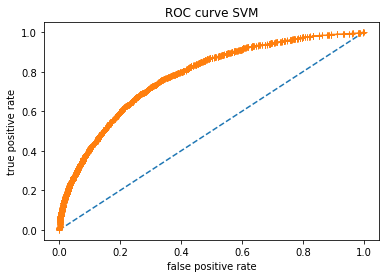

0.2559822956661839
Wall time: 1min


In [13]:
%%time
svm = LinearSVC(C=.01, random_state=22, tol=1e-3, max_iter=1000, class_weight='balanced')
svm.fit(X_train, y_train)  

y_pred1=svm._predict_proba_lr(X_val)[:,1]

auc = roc_auc_score(y_val, y_pred1)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_val, y_pred1)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='+')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve SVM')
# show the plot
plt.show()

ave_prec1=average_precision_score(y_val,y_pred1)  
print(ave_prec1)

### Naive Bayes Classifier

In [14]:
from sklearn.naive_bayes import GaussianNB

AUC: 0.742


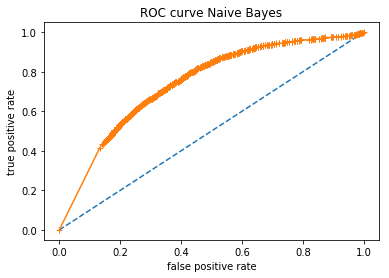

0.1600472363573086
Wall time: 3.98 s


In [15]:
%%time
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred2=gnb.predict_proba(X_val)[:,1]


auc = roc_auc_score(y_val, y_pred2)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_val, y_pred2)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='+')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve Naive Bayes')
# show the plot
plt.show()

ave_prec2=average_precision_score(y_val,y_pred2)  
print(ave_prec2)

### Random Forest

In [16]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth=20, random_state=0, n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=20, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

AUC: 0.924


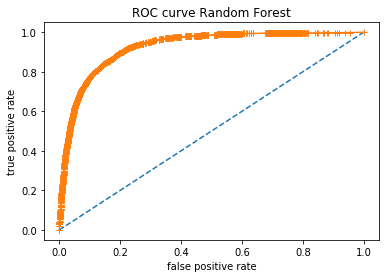

0.5121215871933595


In [17]:
y_pred3=rf.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred3)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_val, y_pred3)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='+')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve Random Forest')
# show the plot
plt.show()

ave_prec3=average_precision_score(y_val,y_pred3)  
print(ave_prec3)

### Linear Discriminant Analysis

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [19]:
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)  

C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


AUC: 0.849


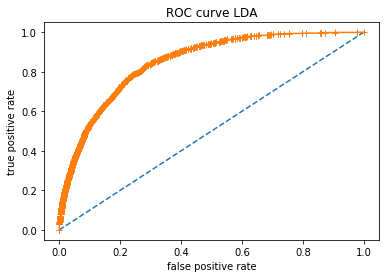

0.3389424661157582


In [20]:
y_pred4=lda.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred4)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_val, y_pred4)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='+')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve LDA')
# show the plot
plt.show()

ave_prec4=average_precision_score(y_val,y_pred4)  
print(ave_prec4)

### LightGBM

In [21]:
import lightgbm as lgb

In [27]:
param = {
    'learning_rate': 0.02,
    'num_leaves': 5,
    'metric':'auc',
    'boost_from_average':'false',
    'feature_fraction': .5,
    'max_depth': -1,
    'objective': 'binary',
    'verbosity': -10}

d_train = lgb.Dataset(X_train, y_train)
d_val = lgb.Dataset(X_val, y_val)
    
# training with early stop
bst = lgb.train(param, d_train, 10000, valid_sets=[d_train, d_val], verbose_eval=50, early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds.
[50]	training's auc: 0.869451	valid_1's auc: 0.87151
[100]	training's auc: 0.881221	valid_1's auc: 0.881198
[150]	training's auc: 0.89685	valid_1's auc: 0.896215
[200]	training's auc: 0.904349	valid_1's auc: 0.903883
[250]	training's auc: 0.909999	valid_1's auc: 0.908902
[300]	training's auc: 0.91443	valid_1's auc: 0.912731
[350]	training's auc: 0.918327	valid_1's auc: 0.915824
[400]	training's auc: 0.921922	valid_1's auc: 0.918859
[450]	training's auc: 0.924548	valid_1's auc: 0.920702
[500]	training's auc: 0.927236	valid_1's auc: 0.922605
[550]	training's auc: 0.929637	valid_1's auc: 0.923751
[600]	training's auc: 0.931805	valid_1's auc: 0.924999
[650]	training's auc: 0.933682	valid_1's auc: 0.925705
[700]	training's auc: 0.935333	valid_1's auc: 0.926378
[750]	training's auc: 0.936958	valid_1's auc: 0.926893
[800]	training's auc: 0.938511	valid_1's auc: 0.927447
[850]	training's auc: 0.939879	valid_1's auc: 0.927772
[900]	

In [28]:
imp_df = pd.DataFrame()
train_features=X_train.columns
imp_df["feature"] = list(train_features)
imp_df["importance_gain"] = bst.feature_importance(importance_type='gain')
imp_df["importance_split"] = bst.feature_importance(importance_type='split')
imp_df['trn_score'] = roc_auc_score(y_val, bst.predict(X_val[train_features]))

AUC: 0.937


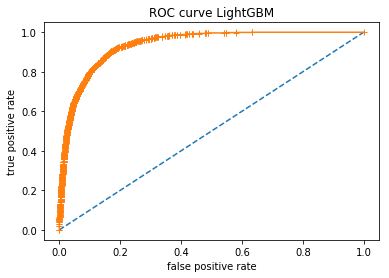

In [41]:
y_pred=bst.predict(X_val)
auc = roc_auc_score(y_val, y_pred)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='+')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve LightGBM')
# show the plot
plt.savefig('ROC.png')
plt.show()

In [30]:
imp_df.sort_values(by='importance_gain',ascending=False)

,feature,importance_gain,importance_split,trn_score
437,par222_FE,64049.658804,511,0.93742
108,par197,30841.165931,276,0.93742
246,par29_FE,30748.055054,186,0.93742
206,par89,17501.140357,279,0.93742
237,par20_FE,14490.833013,92,0.93742
223,par6_FE,10480.427867,116,0.93742
10,par108,5425.113798,50,0.93742
434,par219_FE,4574.714701,119,0.93742
238,par21_FE,4412.138901,67,0.93742
166,par48,3675.237920,89,0.93742


In [31]:
y_pred=bst.predict(X_val) 
pd.DataFrame( y_pred,columns=['prediction']).describe()

,prediction
count,16494.000000
mean,0.070314
std,0.149340
min,0.000028
25%,0.003102
50%,0.011107
75%,0.051673
max,0.988181


In [32]:
np.percentile(y_pred, [ 90, 95, 99])

array([0.21012962, 0.41457765, 0.7521223 ])

(array([13670.,  1090.,   515.,   338.,   263.,   214.,   147.,   128.,
           74.,    55.]),
 array([2.81002017e-05, 9.88433733e-02, 1.97658646e-01, 2.96473919e-01,
        3.95289193e-01, 4.94104466e-01, 5.92919739e-01, 6.91735012e-01,
        7.90550285e-01, 8.89365558e-01, 9.88180831e-01]),
 <a list of 10 Patch objects>)

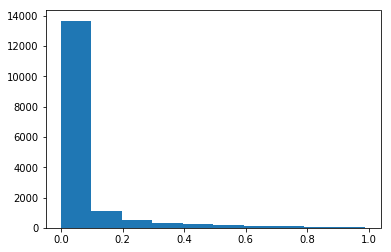

In [69]:
plt.hist( y_pred)

In [65]:
y_pred1=np.zeros(len(y_pred))
y_pred1[ y_pred>=.21 ]=1
y_pred1[ y_pred<.21 ]=0

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred1, target_names=['negative class', 'positive class']))
plt.savefig('cr.png')

                precision    recall  f1-score   support

negative class       0.98      0.94      0.96     15322
positive class       0.47      0.69      0.56      1172

     micro avg       0.92      0.92      0.92     16494
     macro avg       0.72      0.81      0.76     16494
  weighted avg       0.94      0.92      0.93     16494



<Figure size 432x288 with 0 Axes>

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val,y_pred1)

array([[14410,   912],
       [  369,   803]], dtype=int64)

In [36]:
print(y_val.value_counts())
np.unique(y_pred1,return_counts=True)

0    15322
1     1172
Name: Status, dtype: int64


(array([0., 1.]), array([13684,  2810], dtype=int64))

0.5621597586080608


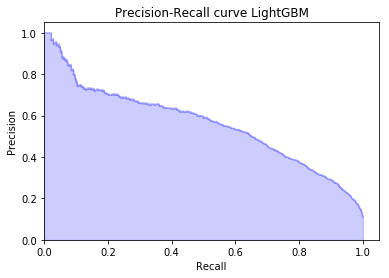

In [42]:
ave_prec=average_precision_score(y_val,y_pred)  
print(ave_prec)
precision, recall, _ = precision_recall_curve(y_val, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('Precision-Recall curve LightGBM')
plt.savefig('PR.png')
plt.show()


### LightGBM and Elliptic Envelope combined

In [11]:
param = {
    'learning_rate': 0.02,
    'num_leaves': 3,
    'metric':'auc',
    'boost_from_average':'false',
    'feature_fraction': .5,
    'max_depth': -1,
    'objective': 'binary',
    'verbosity': -10}

d_train = lgb.Dataset(X_train, y_train)
d_val = lgb.Dataset(X_val, y_val)
    
# training with early stop
bst = lgb.train(param, d_train, 5000, valid_sets=[d_train, d_val], verbose_eval=50, early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds.
[50]	training's auc: 0.550784	valid_1's auc: 0.537157
[100]	training's auc: 0.555674	valid_1's auc: 0.538129
[150]	training's auc: 0.573132	valid_1's auc: 0.539144
[200]	training's auc: 0.583571	valid_1's auc: 0.537176
Early stopping, best iteration is:
[138]	training's auc: 0.566709	valid_1's auc: 0.543496


## Predicting training and testing sets

In [73]:
train_num.shape, test.shape

((65974, 439), (41907, 439))

In [129]:
## Predicting on training set
pred_train=bst.predict(train_num)
pred_tr=pd.DataFrame(train_id)  
pred_tr['proba']=pred_train
pred_tr.to_csv('pred_tr.csv')

In [130]:
## Predicting on testing set
pred_test=bst.predict(test)
pred_te=pd.DataFrame(test_id)  
pred_te['proba']=pred_test
pred_te.to_csv('pred_te.csv')